<a href="https://colab.research.google.com/github/Arpit-Bhute/Internship-Project/blob/master/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign for Banking Products** 

# 1.1: Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2:Importing dataset

In [ ]:
#Importing dataset
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# 1.3:Performing operation on data to check data types,statistical summary,shape, null values etc.

In [ ]:
data.index

RangeIndex(start=0, stop=5000, step=1)

In [ ]:
data.shape

(5000, 11)

In [ ]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   ZIP Code            5000 non-null   int64   
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   int64   
 5   Personal Loan       5000 non-null   int64   
 6   Securities Account  5000 non-null   int64   
 7   CD Account          5000 non-null   int64   
 8   Online              5000 non-null   int64   
 9   CreditCard          5000 non-null   int64   
 10  Mortgage_final      5000 non-null   category
dtypes: category(1), float64(1), int64(9)
memory usage: 396.0 KB


In [ ]:
#Gives description of data such as mean, first quartile,third quartile etc.
data.describe()

,Age,Income,ZIP Code,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,1.937938,1.881000,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.747659,0.839869,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,2.500000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,10.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Gives false for particular data if null value is not present,true otherwise
data.isnull()

,Age,Income,ZIP Code,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_final
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Gives total number of null values in the data according to particular column
data.isnull().sum()

Age                   0
Income                0
ZIP Code              0
CCAvg                 0
Education             0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Mortgage_final        0
dtype: int64

In [ ]:
#Gives mean value of particular column
data.mean()

Age                      45.338400
Income                   73.774200
ZIP Code              93152.503000
CCAvg                     1.937938
Education                 1.881000
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
Mortgage_final            0.411400
dtype: float64

In [ ]:
#Data type of each column
data.dtypes

Age                      int64
Income                   int64
ZIP Code                 int64
CCAvg                  float64
Education                int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
Mortgage_final        category
dtype: object

In [ ]:
#Dtat of the first 5 rows 
data.head()

In [ ]:
#Data of the last 5 rows
data.tail()

In [ ]:
#10 random samples of the data
data.sample(10)

# 2:Cleaning the data

In [ ]:
#Columns such as ID,Experience and Family has no use so removing them will not affect the remaining data
data=data.drop(['ID','Experience','Family'],axis=1)
data.head()

,Age,Income,ZIP Code,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,1.6,1,0,0,1,0,0,0
1,45,34,90089,1.5,1,0,0,1,0,0,0
2,39,11,94720,1.0,1,0,0,0,0,0,0
3,35,100,94112,2.7,2,0,0,0,0,0,0
4,35,45,91330,1.0,2,0,0,0,0,0,1


# 3.1: Number of unique in each column

In [ ]:
#Number of unique data in each column
data.nunique()

Age                    45
Income                162
ZIP Code              467
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

# 3.2:Number of people with zero mortgage


In [ ]:
x1=data.iloc[:,5]
c=0
for count in x1.values:
  if count==0:
    c=c+1
print(c)

3462


# 3.3:Number of people with zero credit card spendng per month

In [ ]:
x2=data.iloc[:,3]
c=0
for count in x2.values:
  if count==0:
    c=c+1
print(c)

106


# 3.4:Value counts of all categorical columns

In [ ]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
data.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
#Dropping the zip code column as it is also unnecessary
data.drop(columns='ZIP Code')

,Age,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,1.6,1,0,0,1,0,0,0
1,45,34,1.5,1,0,0,1,0,0,0
2,39,11,1.0,1,0,0,0,0,0,0
3,35,100,2.7,2,0,0,0,0,0,0
4,35,45,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1.9,3,0,0,0,0,1,0
4996,30,15,0.4,1,85,0,0,0,1,0
4997,63,24,0.3,3,0,0,0,0,0,0
4998,65,49,0.5,2,0,0,0,0,1,0


# 3.5:Univariate Analysis

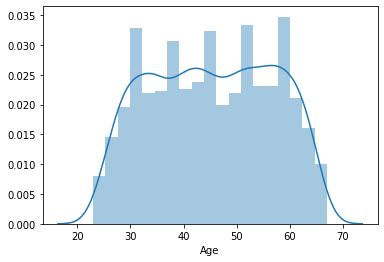

In [ ]:
#plotting the age column
sns.distplot(data['Age'])

The given graph is approximately normal and is feasible so no transformation required.

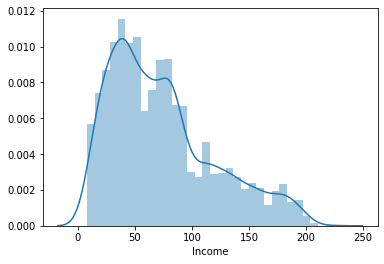

In [ ]:
#Plotting Income column
sns.distplot(data['Income'])

The graph is right skewed so data transformation is needed to make the data normal.

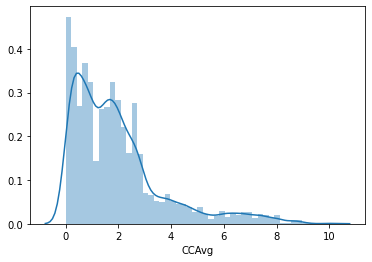

In [ ]:
sns.distplot(data['CCAvg'])

The graph is right skewed so data transformation is needed to make the data normal.

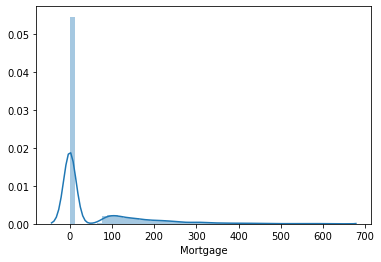

In [ ]:
sns.distplot(data['Mortgage'])

The graph is right skewed so data transformation is needed to make the data normal.

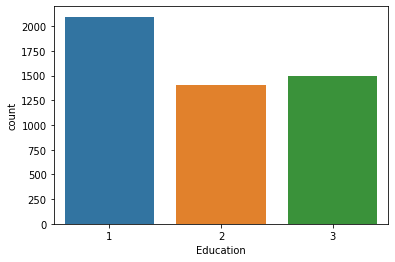

In [ ]:
sns.countplot(data.Education)

Displays the value count for categorical data,here education.

# 3.6:Multivariate Analysis 

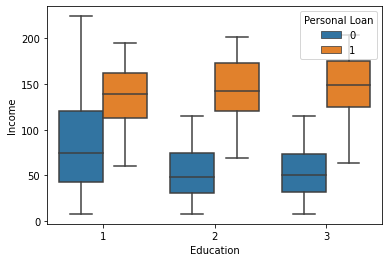

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

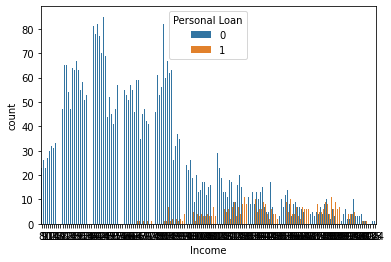

In [ ]:
sns.countplot(x='Income',hue='Personal Loan',data=data)

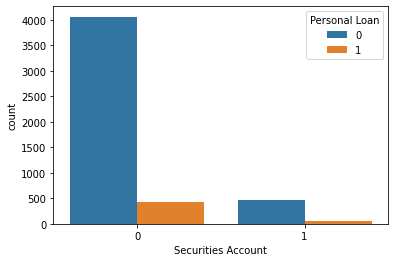

In [ ]:
sns.countplot(x='Securities Account',hue='Personal Loan',data=data)

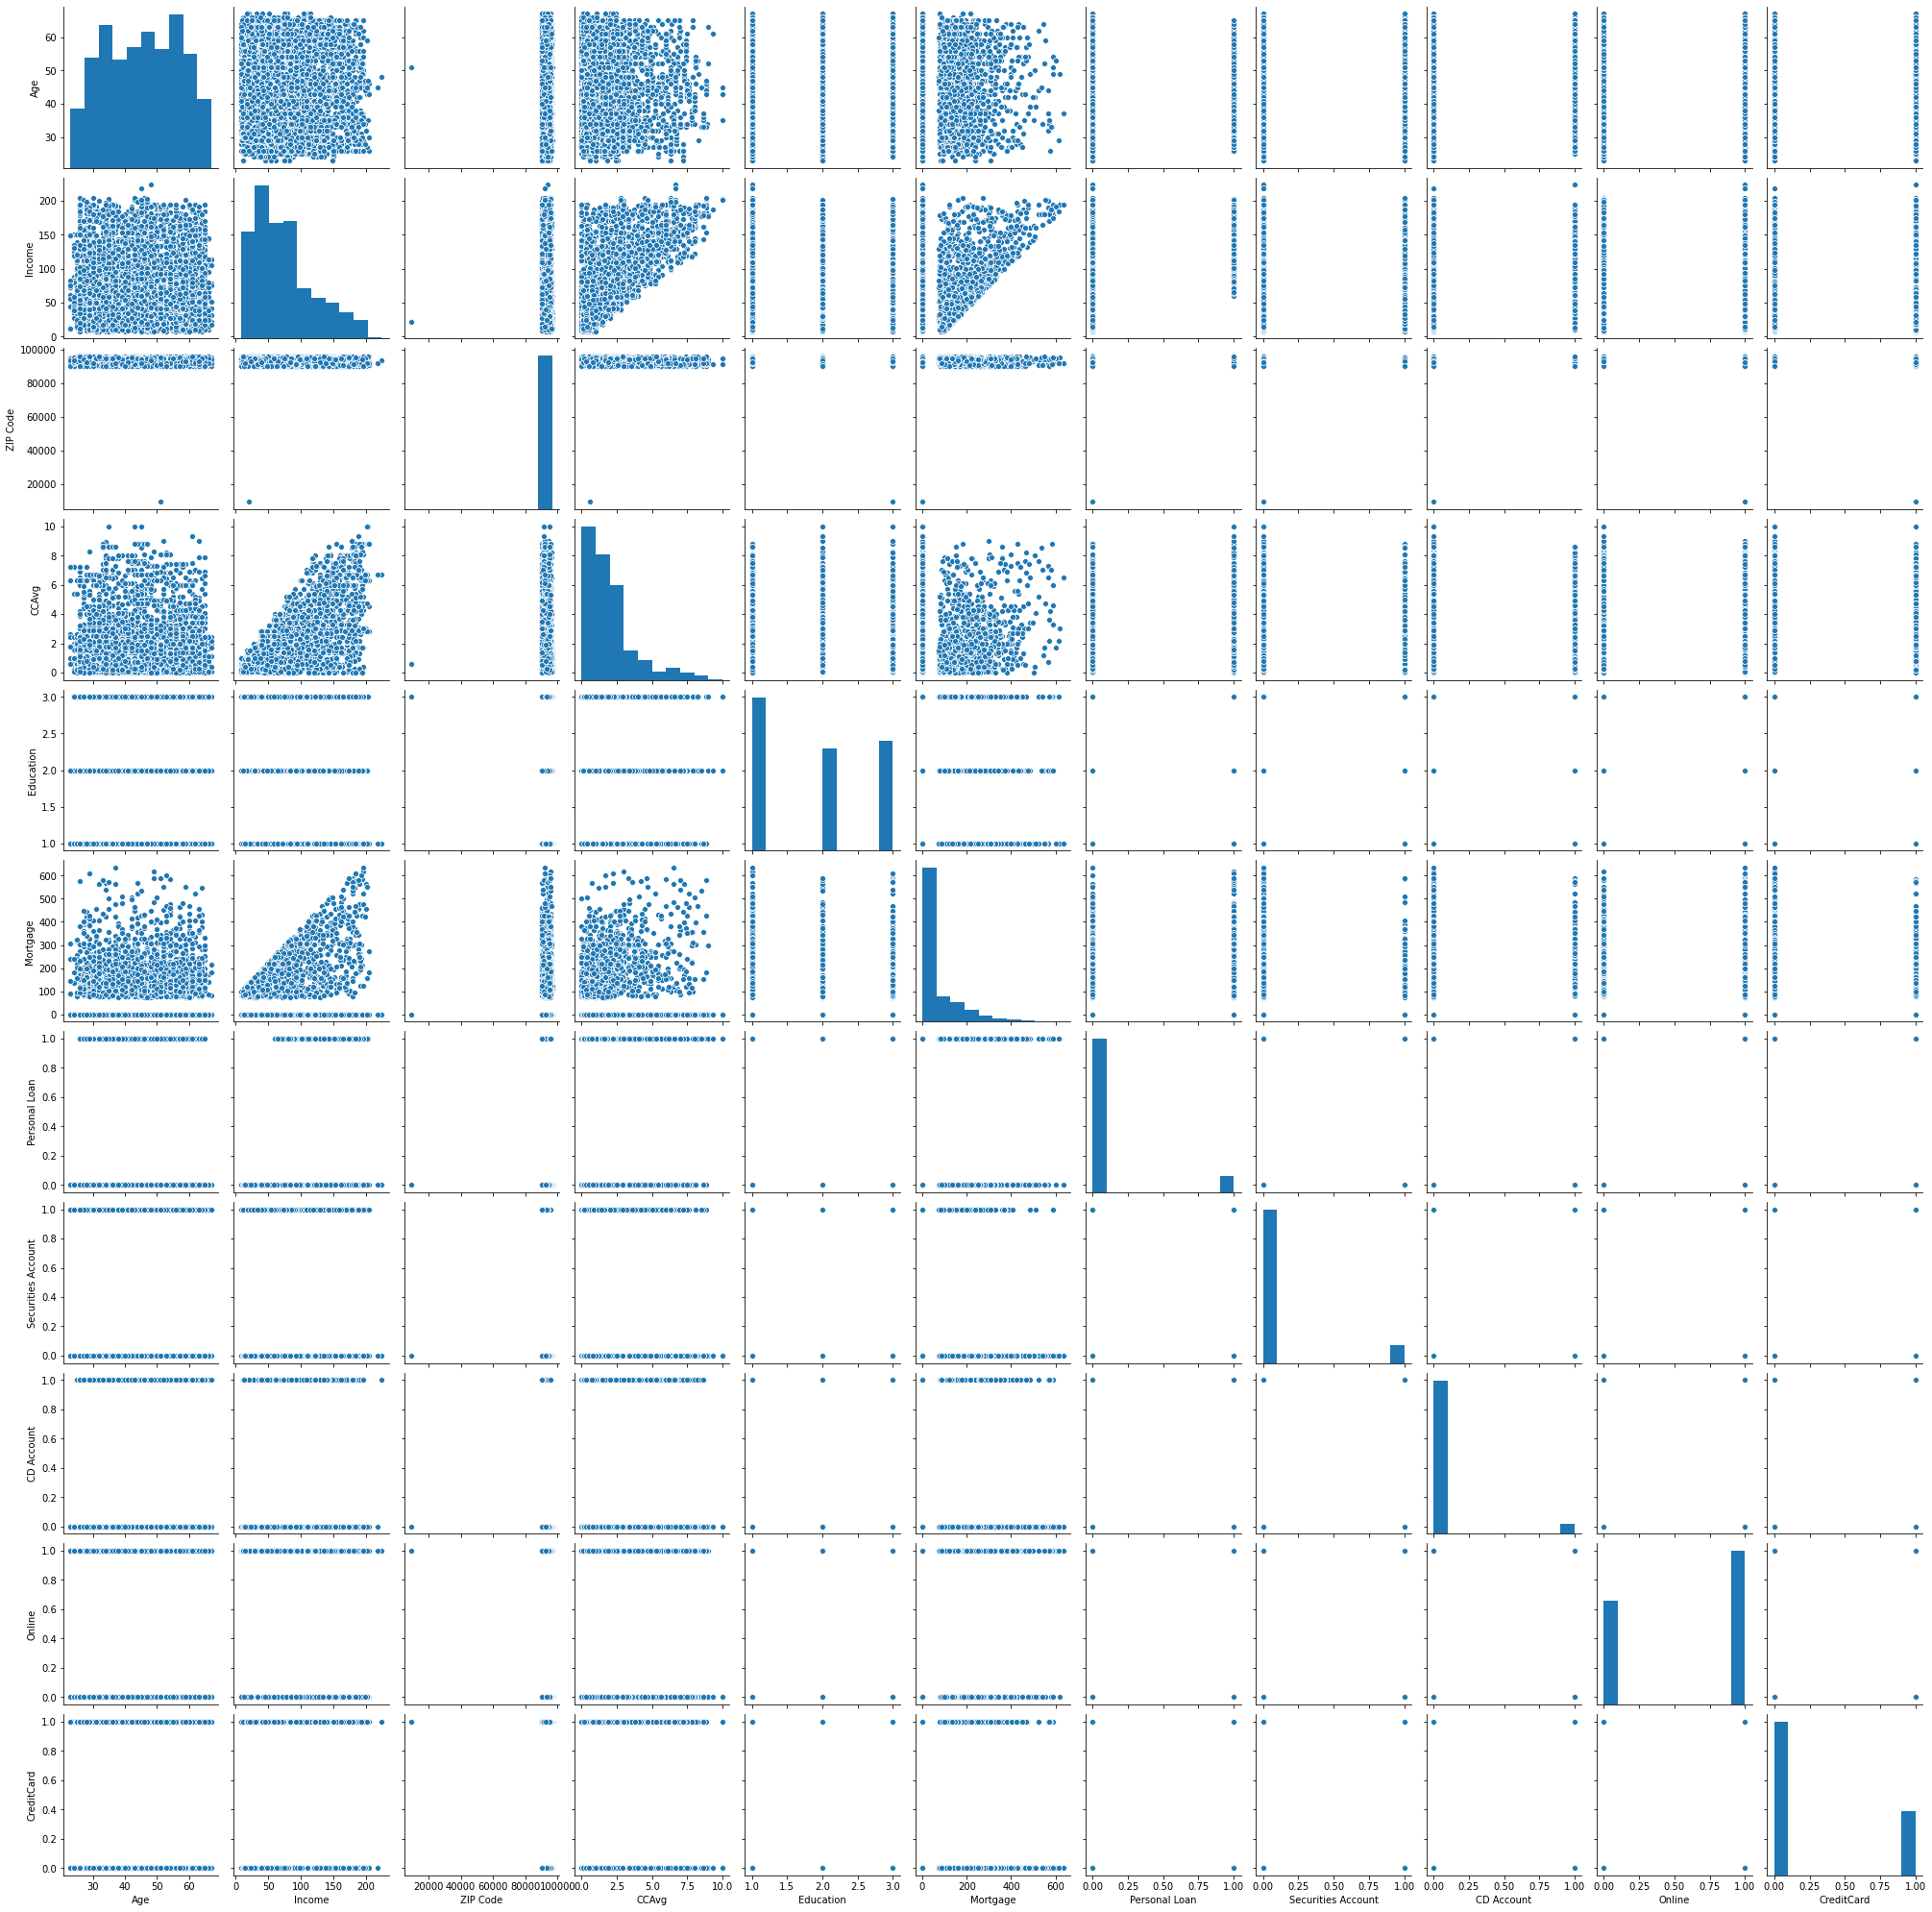

In [ ]:
sns.pairplot(data)

# 4:Necessaary Transformations

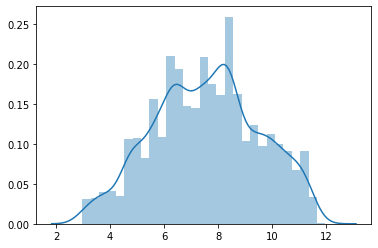

In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=False)
power.fit(data['Income'].values.reshape(-1,1))
ft=power.transform(data['Income'].values.reshape(-1,1))
sns.distplot(ft)

Now the graph for income is normalised after data transformation. 

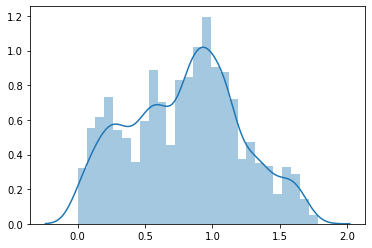

In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=False)
power.fit(data['CCAvg'].values.reshape(-1,1))
ft=power.transform(data['CCAvg'].values.reshape(-1,1))
sns.distplot(ft)

Now the graph for CCAvg is normalised after data transformation.

In [ ]:
data['Mortgage_final']=pd.cut(data['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data.drop('Mortgage',axis=1,inplace=True)
data.head()


,Age,Income,ZIP Code,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_final
0,25,49,91107,1.6,1,0,1,0,0,0,0
1,45,34,90089,1.5,1,0,1,0,0,0,0
2,39,11,94720,1.0,1,0,0,0,0,0,0
3,35,100,94112,2.7,2,0,0,0,0,0,0
4,35,45,91330,1.0,2,0,0,0,0,1,0


The data for mortgage is binned to particular value and hence transformed.

# 5:Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
feature_variable=data.loc[:,data.columns!='Personal Loan']
target_variable=data[['Personal Loan']]
x_train, x_test, y_train, y_test = train_test_split(feature_variable,target_variable,test_size = 0.3,stratify=target_variable,random_state=0)

The data is splitted in 70% training and 30% test data.

# 6.1:Using Logistic Regression model to predict the likelihood of customer buying personal loan

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_train, x_test

(array([[ 0.50989681, -1.07810463,  0.50279974, ...,  0.83854816,
          1.52960605, -0.47490853],
        [ 1.64360991, -0.8385991 , -1.27990994, ..., -1.19253735,
         -0.65376311, -0.47490853],
        [ 0.59710551, -0.92569202,  0.77760654, ...,  0.83854816,
          1.52960605, -0.47490853],
        ...,
        [ 1.55640121, -0.90391879,  0.81074241, ..., -1.19253735,
         -0.65376311, -0.47490853],
        [-0.88544239, -0.46845417,  1.08378196, ..., -1.19253735,
          1.52960605, -0.47490853],
        [-1.32148589,  1.07744522,  1.07892203, ...,  0.83854816,
         -0.65376311, -0.47490853]]),
 array([[-0.97265109,  2.31851937, -0.06183544, ..., -1.19253735,
         -0.65376311, -0.47490853],
        [ 0.85873161,  0.16296952, -0.45946585, ..., -1.19253735,
         -0.65376311, -0.47490853],
        [ 0.24827071,  1.18631137,  0.6384359 , ..., -1.19253735,
         -0.65376311, -0.47490853],
        ...,
        [ 0.68431421, -0.92569202, -0.68832425, ..., -

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicting the results on training and test data set
x_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)
print(x_pred)
print(y_pred)

[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [ ]:
#Calculating performance
from sklearn import metrics
print('Training data accuracy:',metrics.accuracy_score(y_train, x_pred))
print('Test data accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision of model:',metrics.precision_score(y_test,y_pred))
print('Recall of model:',metrics.recall_score(y_test,y_pred))
print('F1-Score of model:',metrics.f1_score(y_test,y_pred))

Training data accuracy: 0.9485714285714286
Test data accuracy: 0.9506666666666667
Precision of model: 0.8240740740740741
Recall of model: 0.6180555555555556
F1-Score of model: 0.7063492063492063


In [ ]:
#Plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test,y_pred)
print(cm_test)

[[1337   19]
 [  55   89]]


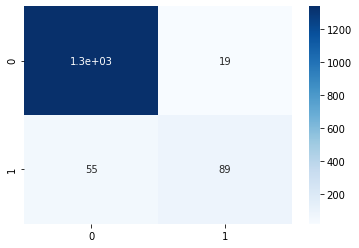

In [ ]:
#Heatmap for test data
sns.heatmap(cm_test, annot=True, cmap='Blues')

# 6.2: Using Random Forest model

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Training and predicting the model
rf=RandomForestClassifier(n_estimators=450)
rf.fit(x_train,y_train)
rf_y_pred=rf.predict(x_test)
rf_x_pred=rf.predict(x_train)
rf_x_pred,rf_y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(array([0, 0, 0, ..., 0, 0, 0]), array([1, 0, 0, ..., 0, 0, 0]))

In [ ]:
#Calculating performance
print('Training data accuracy:',metrics.accuracy_score(y_train, rf_x_pred))
print('Test data accuracy:',metrics.accuracy_score(y_test,rf_y_pred))
print('Precision of model:',metrics.precision_score(y_test,rf_y_pred))
print('Recall of model:',metrics.recall_score(y_test,rf_y_pred))
print('F1-Score of model:',metrics.f1_score(y_test,rf_y_pred))

Training data accuracy: 1.0
Test data accuracy: 0.9733333333333334
Precision of model: 0.9333333333333333
Recall of model: 0.7777777777777778
F1-Score of model: 0.8484848484848485


In [ ]:
#COnfusion Matrix
cm_test_rf = confusion_matrix(y_test,rf_y_pred)
print(cm_test_rf)

[[1348    8]
 [  32  112]]


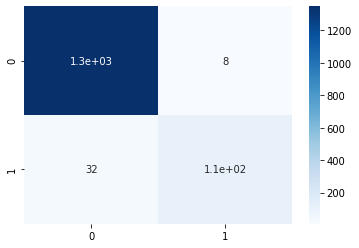

In [ ]:
#Heatmap 
sns.heatmap(cm_test_rf, annot=True, cmap='Blues')

# 6.3:Using Naive Bayes Model

In [ ]:
#Training and predicting the model
from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_y_pred=nb.predict(x_test)
nb_x_pred=nb.predict(x_train)
nb_x_pred,nb_y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0, 0, 0, ..., 0, 0, 0]), array([1, 0, 1, ..., 0, 0, 0]))

In [ ]:
#Calculating performance
print('Training data accuracy:',metrics.accuracy_score(y_train, nb_x_pred))
print('Test data accuracy:',metrics.accuracy_score(y_test,nb_y_pred))
print('Precision of model:',metrics.precision_score(y_test,nb_y_pred))
print('Recall of model:',metrics.recall_score(y_test,nb_y_pred))
print('F1-Score of model:',metrics.f1_score(y_test,nb_y_pred))

Training data accuracy: 0.878
Test data accuracy: 0.8866666666666667
Precision of model: 0.4375
Recall of model: 0.6319444444444444
F1-Score of model: 0.5170454545454545


In [ ]:
#Confusion Matrix
cm_test_nb = confusion_matrix(y_test,nb_y_pred)
print(cm_test_nb)

[[1239  117]
 [  53   91]]


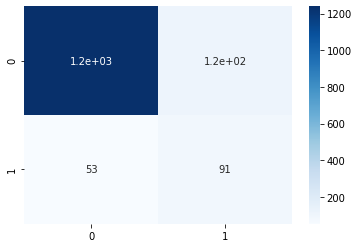

In [ ]:
#Heatmap 
sns.heatmap(cm_test_nb, annot=True, cmap='Blues')

# 6.4:Using Decision Trees model

In [ ]:
#Training and predicting the model
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(max_depth=3)
d_tree.fit(x_train,y_train)
d_tree_y_pred=d_tree.predict(x_test)
d_tree_x_pred=d_tree.predict(x_train)
d_tree_x_pred,d_tree_y_pred

(array([0, 0, 0, ..., 0, 0, 0]), array([1, 0, 0, ..., 0, 0, 0]))

In [ ]:
#Calculating performance
print('Training data accuracy:',metrics.accuracy_score(y_train, d_tree_x_pred))
print('Test data accuracy:',metrics.accuracy_score(y_test,d_tree_y_pred))
print('Precision of model:',metrics.precision_score(y_test,d_tree_y_pred))
print('Recall of model:',metrics.recall_score(y_test,d_tree_y_pred))
print('F1-Score of model:',metrics.f1_score(y_test,d_tree_y_pred))

Training data accuracy: 0.9691428571428572
Test data accuracy: 0.9726666666666667
Precision of model: 0.9256198347107438
Recall of model: 0.7777777777777778
F1-Score of model: 0.8452830188679246


In [ ]:
cm_test_d_tree = confusion_matrix(y_test,d_tree_y_pred)
print(cm_test_d_tree)

[[1347    9]
 [  32  112]]


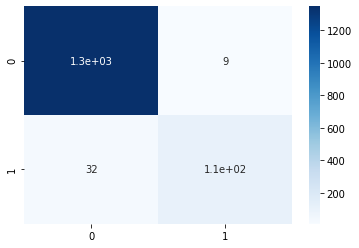

In [ ]:
#Heatmap 
sns.heatmap(cm_test_d_tree, annot=True, cmap='Blues')

# 7:Business Understanding of Model


The main goal of this project was to predict the likelihood of the liability customer buying the personal loans. So to carry out the task firstly the all the necesasary libraries were imported followed ny the dataset. Then further unnecessary data has been removed out or cleaned to make our predictions easier,simpler,faster and more effective. The data which was not normal has been normalised using specific transformations. Further the data has been splitted in 70:30 for traing and test respectively. Now the main task was to analyse and predict the outcome using various models. I have used Logistic Regression Algorithm,Random Forest Algorithm,Naive Bayes Algorithm, and Decision Trees Algorithm. After training and predicting all the models their performance has been evaluated with the help of confusion matrix and heatmap.The best accuracy model was Random Forest which had 97.34% accuracy followed by Decision trees which was 97.26% and last two were Logistic Regression and Naive Bayes which had 95.06% and 88.67% respectively.But not always accuracy determines the perfection of model so I looked at Precision and Recall too. Now the best precision model was found out to be Random Forest with maximum precision and recall which was 93.34% and 77.78%. Least was for the Naive Bayes which was less than 50% so it was the worst model. After Random Forest better precision and recall was of Decision tress followed by Logistic Regression. To be more specific F1-score was calculated. The best F1-score was of Random Forest again with 0.8484 followed by decision trees which is 0.8452. These two models has nearly the same F1-score value but Random Forest has slightly higher. Hence to predict the outcome the best model will be Random Forest which has highest accuracy,precision,recall and F1-score. This model will be beneficial and will give out best outcome. 